# World's largest islands

This dataset `largest-islands.csv` contains information about the 100 largest islands in the world. The unit for the `area` column is km2.

Overview of the dataframe

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('largest-islands.csv')
df

,region,island,area,countries,climate,rank
0,Africa,Madagascar,591896,Madagascar,tropics,4
1,Antarctic,Kerguelen,6200,"Antarctic Lands, France",temperate,91
2,Asia,Sumba,11153,Indonesia,tropics,65
3,Asia,Hainan,34300,China,tropics,37
4,Asia,Taiwan,36198,Taiwan,tropics,36
...,...,...,...,...,...,...
95,Oceania,Guadalcanal,5302,Solomon Islands,tropics,100
96,South America,East Falkland,6605,Argentina,temperate,89
97,South America,Chiloe,8394,Chile,temperate,81
98,South America,Isla Grande de Tierra del Fuego,47992,"Chile, Argentina",temperate,28


### Project Ideas

- What are the 10 largest islands in the tropics?

- What are the largest islands in each `region`?

- Create a line graph with `area` on the y-axis and `rank` on the x-axis. The data should be ordered by `rank`, from largest to smallest.

Top 10 largest islands with a tropical climate

In [65]:
# Top 10 largest islands by area by tropics
top_10 = df.query("climate == 'tropics'").sort_values(by='area' , ascending=False).head(10)
top_10

,region,island,area,countries,climate,rank
86,Oceania,New Guinea,821400,"Papua New Guinea, Indonesia",tropics,2
23,Asia,Borneo,755000,"Indonesia, Malaysia, Brunei",tropics,3
0,Africa,Madagascar,591896,Madagascar,tropics,4
28,Asia,Sumatra,480793,Indonesia,tropics,6
22,Asia,Sulawesi,188522,Indonesia,tropics,11
21,Asia,Java,129438,Indonesia,tropics,13
80,North America,Cuba,109884,Cuba,tropics,16
26,Asia,Luzon,104688,Philippines,tropics,17
14,Asia,Mindanao,94630,Philippines,tropics,19
73,North America,Hispaniola,76192,"Dominican Republic, Haiti",tropics,23


Largest Islands in per region

In [66]:
# Largest Islands in per region
region_largest = df.groupby('region').max('area')
region_largest

,area,rank
region,,
Africa,591896,4
Antarctic,6200,91
Asia,755000,98
Eurasia,76400,91
Europe,2166086,86
North America,507451,99
Oceania,821400,100
South America,47992,95


Create a line graph with `area` on the y-axis and `rank` on the x-axis. The data should be ordered by `rank`, from largest to smallest.

We will be using the function clean_axes(), to make the graph much readable.

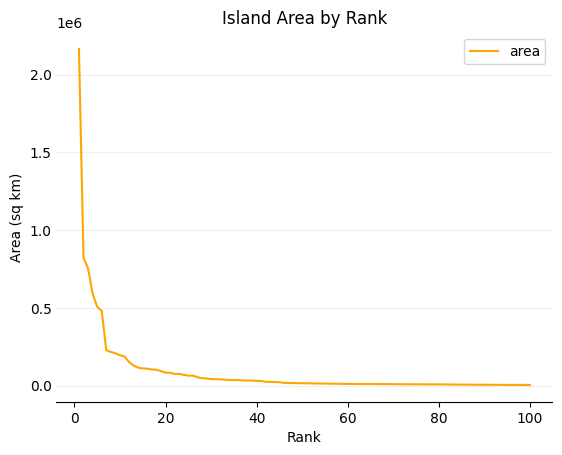

In [67]:
def clean_axes( ):
    ax = plt.gca()
    ax.spines[['top', 'left', 'right']].set_visible(False)
    ax.grid(axis='y', alpha=0.2)
    ax.tick_params(axis='y', length=0)

df = df.sort_values(by='rank', ascending=True)
df.plot(x='rank', y='area', color = 'orange')
plt.xlabel('Rank')
plt.ylabel('Area (sq km)')
plt.title('Island Area by Rank')
clean_axes( )

In this graph, we used the "Rank" and "Area" columns to form the line graph. There's only one inference that we can get from this, one is that the ranking system from the data is reliable when it comes to measurement of the islands.

In [71]:
# Count of countries per region
region_count = df['region'].value_counts().reset_index()
region_count.columns = ['region', 'count']
region_count

,region,count
0,North America,32
1,Asia,28
2,Europe,14
3,Oceania,12
4,Eurasia,8
5,South America,4
6,Africa,1
7,Antarctic,1


Now, we would like to create another graph that will show the average area of islands per region and make some other inferences.

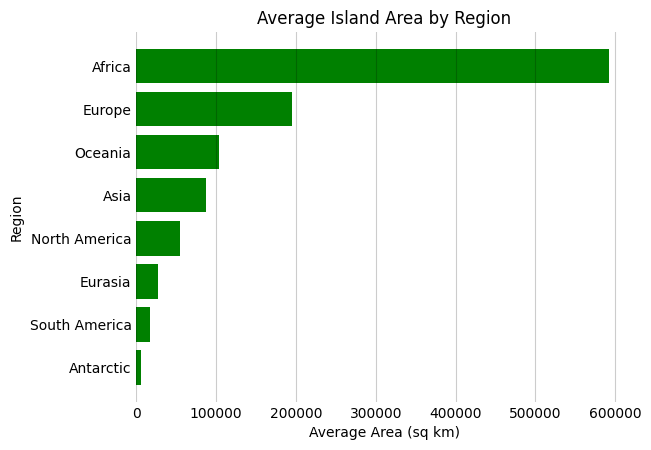

In [72]:
def clean_bar_axes( ):
    ax = plt.gca()
    ax.spines[['top', 'bottom', 'right' , 'left']].set_visible(False)
    ax.grid(axis='x', color='black', alpha=0.2)
    ax.tick_params(axis='both', length=0)

average_area = df.groupby('region')['area'].mean().reset_index().sort_values(by='area')
plt.barh(average_area['region'], average_area['area'], color='green')
plt.xlabel('Average Area (sq km)')
plt.ylabel('Region')    
plt.title('Average Island Area by Region')
clean_bar_axes( )

Africa is ahead as the one with the most average island area in the world. However, this data could be incomplete. Upon looking the the overview of the dataframe, Madagascar is the only country that is in the Africa region. That is why when we tried to calculate the average island area, it only divides to only one country. While others have more than 30, their average amounts are much more credible.

Since the data is incomplete, it is not advisable to make an inference for they are not 100% reliable.